# **Solución de la ecuación de Loewner**

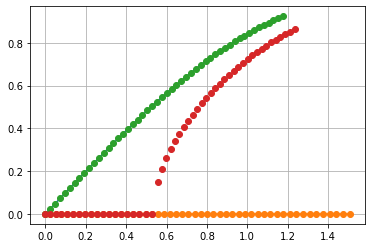

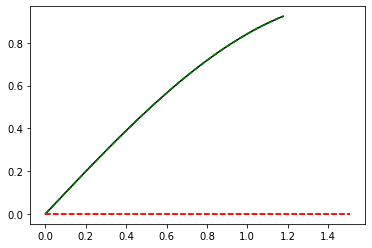

In [48]:
import numpy as np 
from matplotlib import animation
import matplotlib.pyplot as plt
from cmath import sqrt

#Animation function
def animate_vid(p, filename):
    fig, ax = plt.subplots()
    ims = []
    n = len(p[0])
    for j in range(len(p)):
        for i in range(len(t)):
            if j == 1 and i==49:
                1
            else:
                im, = ax.plot(p[j][i].real, p[j][i].imag, "k-")
                ims.append([im])
        ax.plot(p[1][n-2].real, p[1][n-2].imag, "g--")
        ax.plot(p[0][n-1].real, p[0][n-1].imag, "r--")
        ani = animation.ArtistAnimation(fig, ims, interval = 1, blit = True, repeat_delay = 0)
        ani.save(filename)

#transformation function
g = lambda zi, z: zi.real + np.sqrt((z-zi.real)**2 + zi.imag**2)
#function to be used in the initialization of the curve evolution
lin = lambda x: np.sin(x)
#initialization of the curve
def curve_points(fun):
    x = np.linspace(0,1.5*np.pi/4,50)
    y = fun(x)
    z = x + y*1j
    return z

w0 = curve_points(lin)
t = np.zeros(len(w0))
w = np.array(w0)
points = np.zeros([len(w), len(t)], dtype=np.complex_)

for jj in range(1, len(t)):
    wi = w[jj]
    t[jj]=t[jj-1]+(1/4)*(wi.imag)**2 
    for ii in range(len(w)-jj):
        w[ii+jj] = g(wi, w[ii+jj])
    points[:][jj] = w 
         
            


plt.plot(w0.real, w0.imag, '-')
#plt.plot(w.real, w.imag, '-o')
plt.plot(points[-1].real, points[-1].imag, '-o')
plt.grid()


############# Inverse #############
def f(w1, ud, dt):
    fz = ud + sqrt((w1-ud)**2 - 4*dt)
    return fz


tt = np.array(t)
u = np.array(w)
zz = np.array(u)
point_in = np.zeros([len(zz), len(tt)], dtype=np.complex_) 

for ii in range(len(w)-1):
    for kk in range(ii+1):
        dtt = tt[len(tt)-1-ii]-tt[len(tt)-2-ii]
        zz[len(zz)-1-kk] = f(zz[len(zz)-1-kk], u[len(tt)-ii-1], dtt)
    
    point_in[:][ii]=zz

all_points = [points, point_in]
plt.plot(zz.real, zz.imag, 'o' )
plt.plot(all_points[1][30].real, all_points[1][30].imag, 'o')


animate_vid(all_points, "SLE_evolution.gif")


## **MOVIMIENTO BROWNIANO**

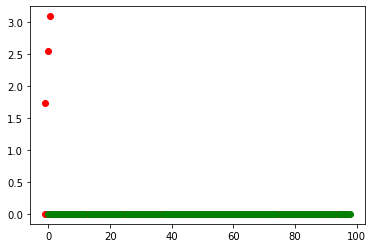

In [101]:
np.random.seed(25)

#Uniform distribution
N = 100
U = np.zeros(N)
for i in range(1, N):
    step = 0
    while step == 0:
        step = np.random.randint(-1,2)
        U[i] = U[i-1] + step

        
point_in = np.zeros(N)
t = np.arange(0, N)
z = np.zeros(N, dtype = np.complex_)
for i in range(N):
    z[i] = i+0*1.j
point_in = np.zeros([len(z), len(t)], dtype=np.complex_) 

for i in range(N-1):
    for k in range(i+1):
        dt = t[len(t)-1-i]-t[len(t)-2-i]
        z[len(z)-1-k] = f(z[len(z)-1-k], U[len(t)-i-1], dt)
    
    point_in[:][i]=z

i =60
plt.plot(z.real, z.imag, 'or' )
plt.plot(point_in[i].real, point_in[i].imag, 'og')

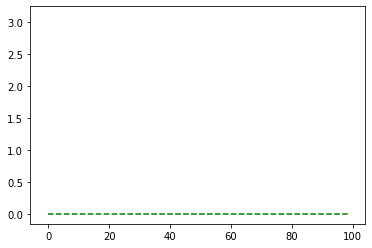

In [96]:
def animate_vid(p, filename):
    fig, ax = plt.subplots()
    ims = []
    for i in range(len(p)):
        if i==0:
            1
        else:
            im, = ax.plot(p[i].real, p[i].imag, "k-")
            ims.append([im])
    ax.plot(p[0].real, p[0].imag, "g--")
    ani = animation.ArtistAnimation(fig, ims, interval = 1, blit = True, repeat_delay = 0)
    ani.save(filename)
    
animate_vid(point_in, "SLE_evolution.gif")
    

### Pruebas de animación

[1.33551576 0.32305442]


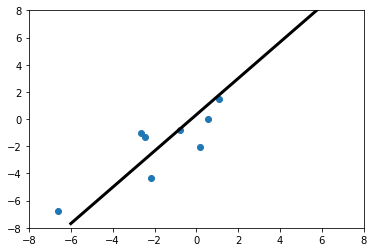

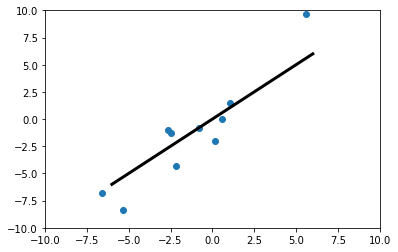

In [5]:
import numpy as np
import matplotlib
# matplotlib.use("Agg") # You can uncomment this line to have a totally non-gui experience - useful for webserver use where the file is rendered and shown to a user.
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter, PillowWriter

# To make sure your example looks like mine, set the random seed. Helps with fine tuning the graph too.
np.random.seed(102434201)

metadata = dict(title='Movie', artist='codinglikemad')
# writer = PillowWriter(fps=15, metadata=metadata)
writer = FFMpegWriter(fps=15, metadata=metadata)

fig = plt.figure()
plt.xlim(-8, 8)
plt.ylim(-8, 8)

# Generate some random linear data to fit:
def func(x):
    return x*1.2 + 0.1 + np.random.normal(0,2, x.shape)

x = np.random.uniform(-7,7,10)
x = np.sort(x) # Sort the x values here so we get a nice left to right progression in the animation
y = func(x)

coeff = np.polyfit(x,y,1)
print(coeff)
xline = np.linspace(-6,6,40) # This controls how long the animation takes below.
yline = np.polyval(coeff, xline)

lPnt, = plt.plot(x, y, 'o')
l, = plt.plot(xline, yline, 'k-', linewidth=3)

plt.show()
# You need to close the figure for the 2nd half of the script to run - remove the plotting above if you want to generate without intervention.


fig = plt.figure()
plt.xlim(-10, 10)
plt.ylim(-10, 10)

lPnt, = plt.plot([], [], 'o')
l, = plt.plot([], [], 'k-', linewidth=3)

xLineList = []
yLineList = []

xPntList = []
yPntList = []

# We generate each plot sequentially here
with writer.saving(fig, "fitPlot.gif", 100):

    # First show the data points
    for xval,yval in zip(x,y):

        xPntList.append(xval)
        yPntList.append(yval)

        lPnt.set_data(xPntList,yPntList)
        l.set_data(xLineList,yLineList)

        # Double up the frames to slow things down a bit here.
        writer.grab_frame()
        writer.grab_frame()

    # Add the line fit
    for xval,yval in zip(xline,xline):

        xLineList.append(xval)
        yLineList.append(yval)

        lPnt.set_data(xPntList,yPntList)
        l.set_data(xLineList,yLineList)

        writer.grab_frame()

    # We pad at the end to create some "pauseing space"
    for ii in range(10):
        writer.grab_frame()

(1000,)


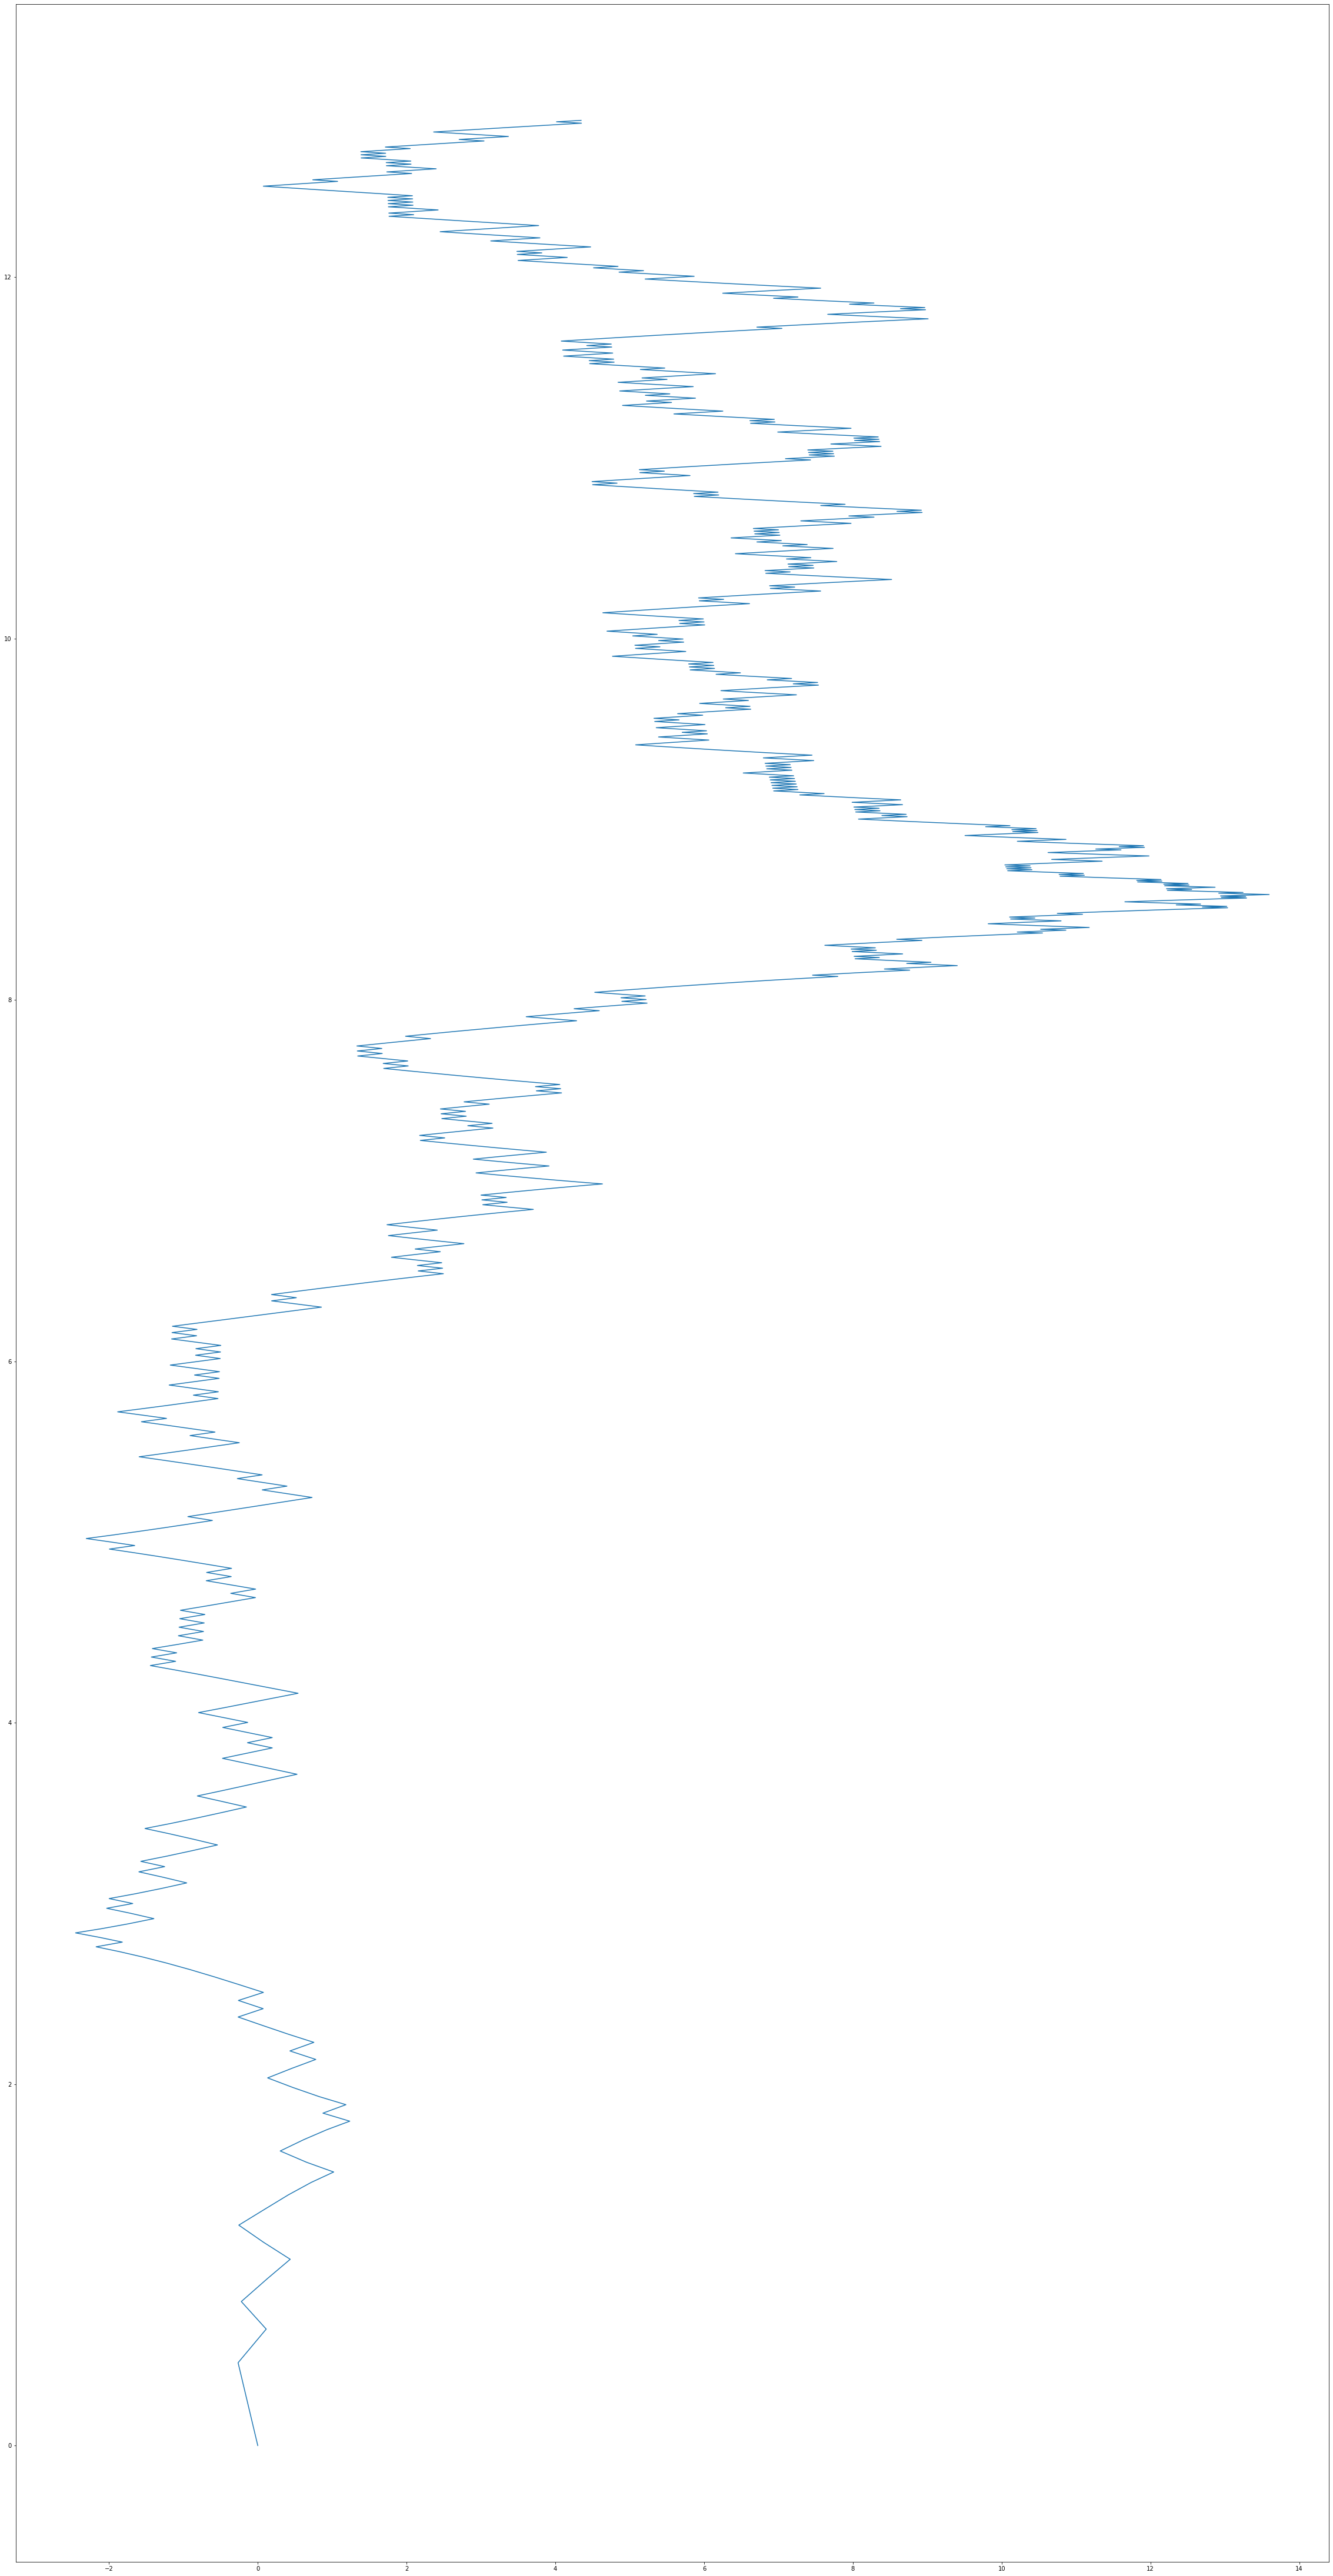

In [19]:
import matplotlib.pyplot as plt
from numpy import sqrt
import numpy as np

def fz1(z, kappa):
    a = (1 - sqrt(kappa/(16+kappa)))/2
    return ((z-a)**a)*(z-(a-1))**(1-a)

def fz2(z, kappa):
    a = (1 - sqrt(kappa/(16+kappa)))/2
    return ((z+a)**a)*(z-(1-a))**(1-a)

#SLE parameters
n = 1000 #Total number of points
kappa = 2 #fractal parameter kappa
#SLE evolution
f1 = np.zeros(n, dtype = np.complex_) #Initialization of the curve
for h in range(1,n):
    p = np.random.rand(1)
    if p>0.5:
        f1[h] =  fz1(f1[h-1],kappa) #recursive call of the first map if p>0.5
    else:
        f1[h] =  fz2(f1[h-1],kappa) #recursive call of the first map if p>0.5

x = np.real(f1)
y = np.imag(f1)

print(np.shape(f1))

plt.figure(figsize=(40,80))
plt.plot(x, y)
plt.show()